In [ ]:
!pip install datasets evaluate transformers[sentencepiece]

In [3]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier(
    [
        "I've been waiting for a HuggingFace course my whole life.",
        "I hate this so much!",
    ]
)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9598049521446228},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

In [6]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [7]:
raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!"
]

inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
print(inputs)

{'input_ids': tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102],
        [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,     0,
             0,     0,     0,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])}


In [11]:
#加载一个通用的预训练模型
from transformers import AutoModel

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModel.from_pretrained(checkpoint)

In [14]:
outputs = model(**inputs)
print(outputs.last_hidden_state.shape)

torch.Size([2, 16, 768])


假设输入是一个句子 "Hello, world!"，并且批量大小为 1，句子被分解为 4 个 token（例如：["hello", ",", "world", "!"]），而模型的 hidden_size 是 768，那么 outputs.last_hidden_state.shape 可能是(1, 4, 768)。
表示模型有 1 个样本（批次大小为 1），序列长度为 4（4 个 token），每个 token 的表示维度为 768。

BERT 的 hidden_size 的维度通常是 768

In [15]:
# 现在加载一个用于序列分类的模型（带有分类头）
from transformers import AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
outputs = model(**inputs)

In [16]:
print(outputs.logits.shape)
#logits 的形状通常是 (batch_size, num_classes)

torch.Size([2, 2])


In [17]:
import torch

predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
print(predictions)

tensor([[4.0195e-02, 9.5980e-01],
        [9.9946e-01, 5.4418e-04]], grad_fn=<SoftmaxBackward0>)


第一行（[4.0195e-02, 9.5980e-01]）表示模型对第一个样本预测为正面情感的概率为 95.98%。
第二行（[9.9946e-01, 5.4418e-04]）表示模型对第二个样本预测为负面情感的概率为 99.95%。

In [18]:
#查看标签映射
model.config.id2label

{0: 'NEGATIVE', 1: 'POSITIVE'}

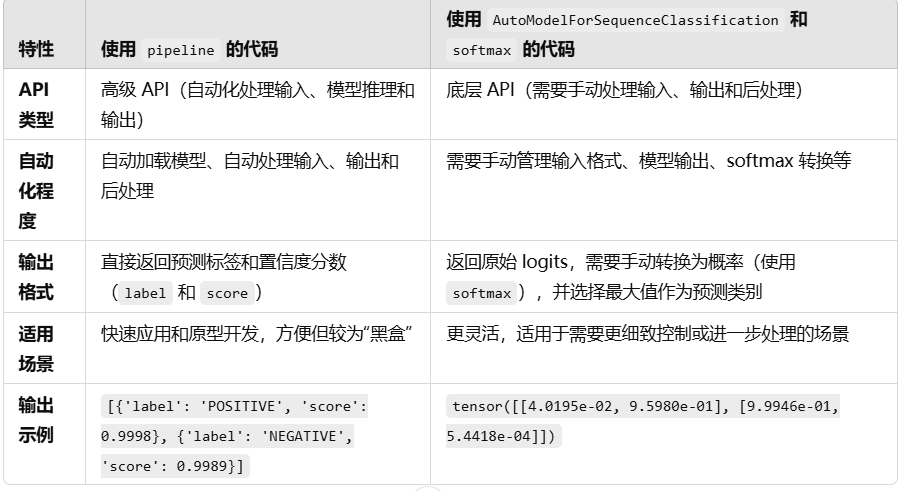